In [2]:
# Import libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
from matplotlib import pyplot as plt

In [3]:
# Get the medal type details dataset
df_medal_type_details = pd.read_csv('../data/etl/medals_by_type_country_season_discip_event_gender.csv')
df_medal_type_details.head()

,country_name,game_season,discipline_title,event_title,event_gender,gold,silver,bronze,total_medals
0,Afghanistan,Summer,Taekwondo,58 - 68 kg men,Men,0.0,0.0,1.0,1.0
1,Afghanistan,Summer,Taekwondo,beijing 2008 taekwondo - 58 kg men,Men,0.0,0.0,1.0,1.0
2,Algeria,Summer,Athletics,1500m men,Men,2.0,1.0,0.0,3.0
3,Algeria,Summer,Athletics,1500m women,Women,2.0,0.0,0.0,2.0
4,Algeria,Summer,Athletics,5000m men,Men,0.0,1.0,0.0,1.0


In [4]:
# Function to slice the medal details dataset
def slice_medal_type_details_data(data_to_select: dict[str, str]) -> pd.DataFrame:
    keep_cols = ['gold', 'silver', 'bronze', 'total_medals']
    group_medal_cols = list(data_to_select.keys())
    group_medal_cols.append('country_name')
    drop_medal_cols: list[str] = []
    for col in df_medal_type_details.columns:
        if col not in group_medal_cols:
            if col not in keep_cols:
                drop_medal_cols.append(col)    

    df_slice = df_medal_type_details.copy()
    for key, value in data_to_select.items():
        df_slice = df_slice[df_slice[key] == value]

    df_slice = df_slice.drop(columns=drop_medal_cols)
    df_slice = df_slice.groupby(group_medal_cols).sum().reset_index()
    df_slice.sort_values(by='total_medals', ascending=False, inplace=True)
    return df_slice.reset_index(drop=True)

In [12]:
def sort_and_drop_columns(df: pd.DataFrame, data_to_select: dict[str, str]) -> pd.DataFrame:
    drop_medal_cols: list[str] = ['total_medals']
    for key in data_to_select.keys():
        drop_medal_cols.append(key)

    df_clean = df.sort_values('total_medals', ascending=False)[:10]
    df_clean: pd.DataFrame = df_clean.drop(columns=drop_medal_cols)
    df_clean.set_index('country_name', inplace=True)
    return df_clean


In [13]:
# Women's summer games correlation
data_to_select = {
    'game_season': 'Summer', 
    'event_gender': 'Women'
}
df = slice_medal_type_details_data(data_to_select)
df.head()

,game_season,event_gender,country_name,gold,silver,bronze,total_medals
0,Summer,Women,United States,287.0,219.0,206.0,712.0
1,Summer,Women,Russia,164.0,161.0,148.0,473.0
2,Summer,Women,Germany,148.0,160.0,143.0,451.0
3,Summer,Women,China,143.0,116.0,97.0,356.0
4,Summer,Women,Australia,70.0,65.0,81.0,216.0


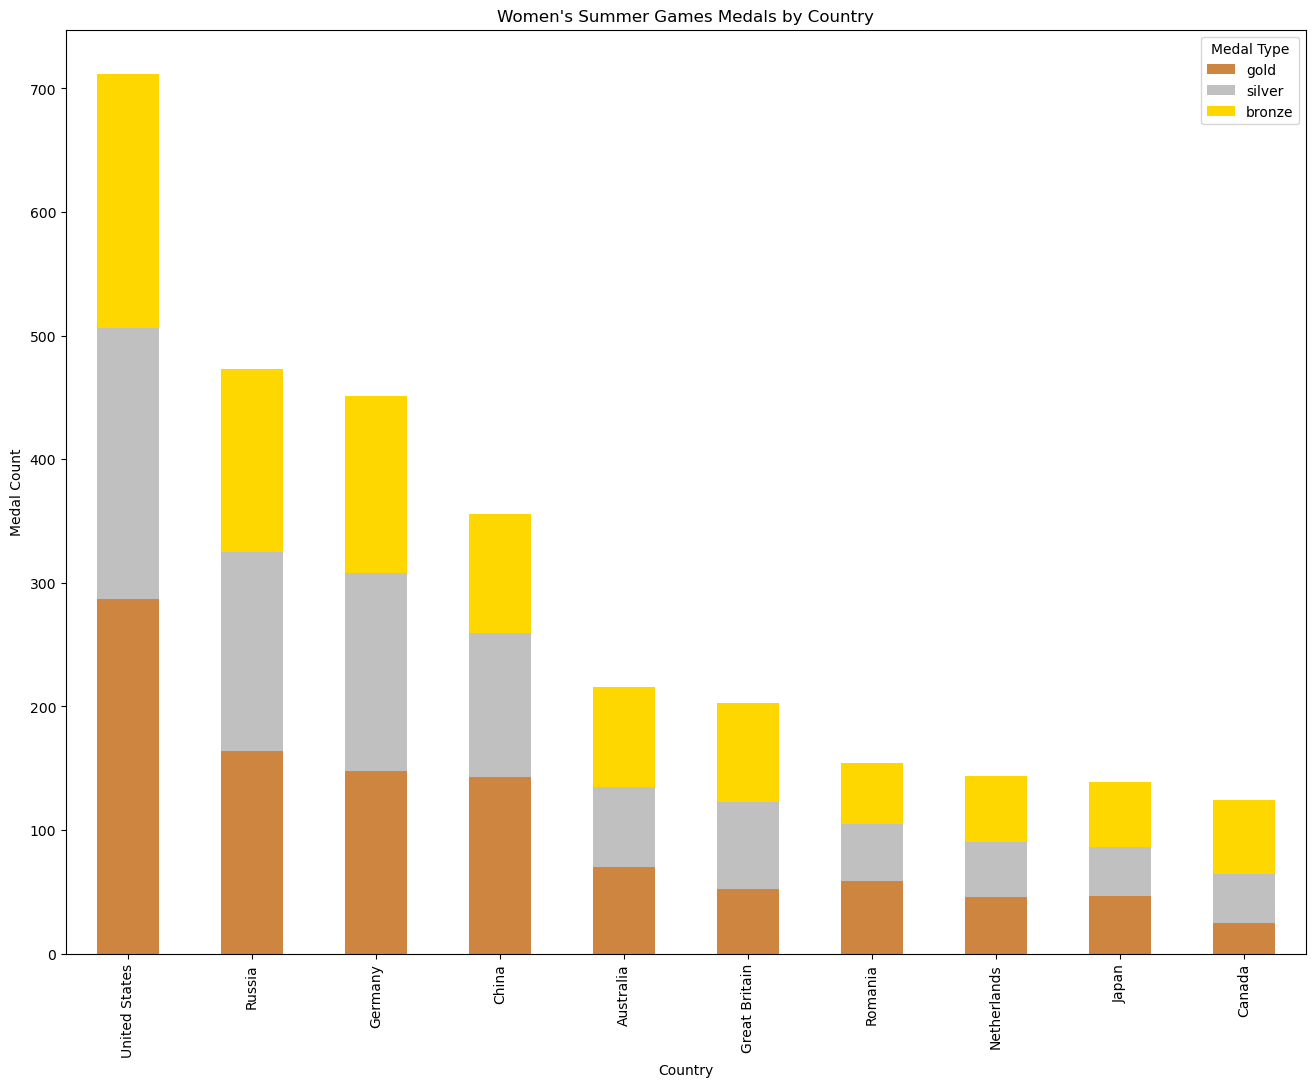

In [14]:
df_women_summer_games = sort_and_drop_columns(df, data_to_select)
ax = df_women_summer_games.plot(kind='bar', stacked=True, color=['peru', 'silver', 'gold'], figsize=(16, 12))
plt.title("Women's Summer Games Medals by Country")
plt.legend(title='Medal Type')
plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.show()